In [12]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel;
import skimage
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float


import cv2;

import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

import os


In [57]:
nuclei_dir="/home/ubuntu/data/nuclei_dsbowl/train"

In [58]:
datas = os.listdir(nuclei_dir)

In [70]:
mask = np.zeros( (img.shape[0],img.shape[1],1  ) );
mask.shape

(360, 360, 1)

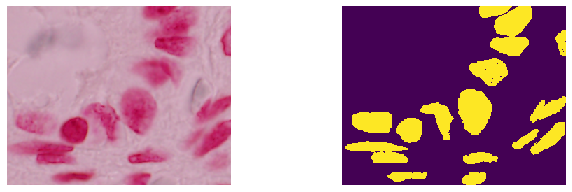

In [89]:
img_id=9;

img = nuclei_dir+"/"+datas[img_id]+"/images/"+datas[img_id]+".png";
img=cv2.imread(img)


mask = np.zeros( (img.shape[0],img.shape[1]) );

mask_path = nuclei_dir+"/"+datas[img_id]+"/masks/";
all_masks = os.listdir(mask_path);

for name in all_masks:
    _mask_path = os.path.join(mask_path,name);
    _mask_image = cv2.imread(_mask_path,-1);
    thresh =0.5
    _mask_image = cv2.threshold(_mask_image, thresh, 255, cv2.THRESH_BINARY)[1]
    
    mask =np.maximum(mask,_mask_image);


    
msk=mask;
#msk=cv2.imread(msk,cv2.IMREAD_GRAYSCALE)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY);


fig = plt.figure(figsize=(10,7));
fig.subplots_adjust(hspace=0.5,wspace=0.5)
ax = fig.add_subplot(1,2,1)
ax.axis('off')
ax.imshow(img)

ax = fig.add_subplot(1,2,2);
ax.axis('off')
ax.imshow(msk)

In [90]:
#sobel and Laplacian
        
deep=cv2.CV_64F;
deep=cv2.CV_32F;
x=cv2.Sobel(img,deep,1,0)
y=cv2.Sobel(img,deep,0,1)

absx= cv2.convertScaleAbs(x)
absy= cv2.convertScaleAbs(y)

dist = cv2.addWeighted(absx,0.5,absy,0.5,0)
    
lap = cv2.Laplacian(img,deep,3)
lap = cv2.convertScaleAbs(lap);

dist_gray = cv2.cvtColor(dist, cv2.COLOR_RGB2GRAY);


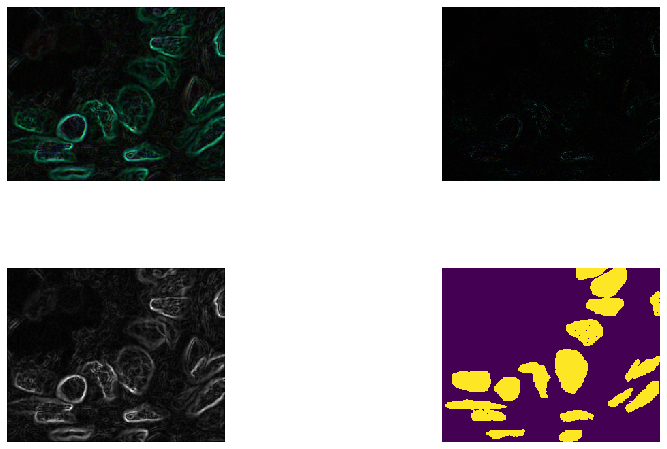

In [91]:
fig = plt.figure(figsize=(13,8));
fig.subplots_adjust(hspace=0.5,wspace=0.5)
ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(dist)
ax = fig.add_subplot(2,2,2);
ax.axis('off')
ax.imshow(lap, cmap=plt.cm.gray)

ax = fig.add_subplot(2,2,3);
ax.axis('off')
ax.imshow(dist_gray, cmap=plt.cm.gray)

ax = fig.add_subplot(2,2,4);
ax.axis('off')
ax.imshow(msk)

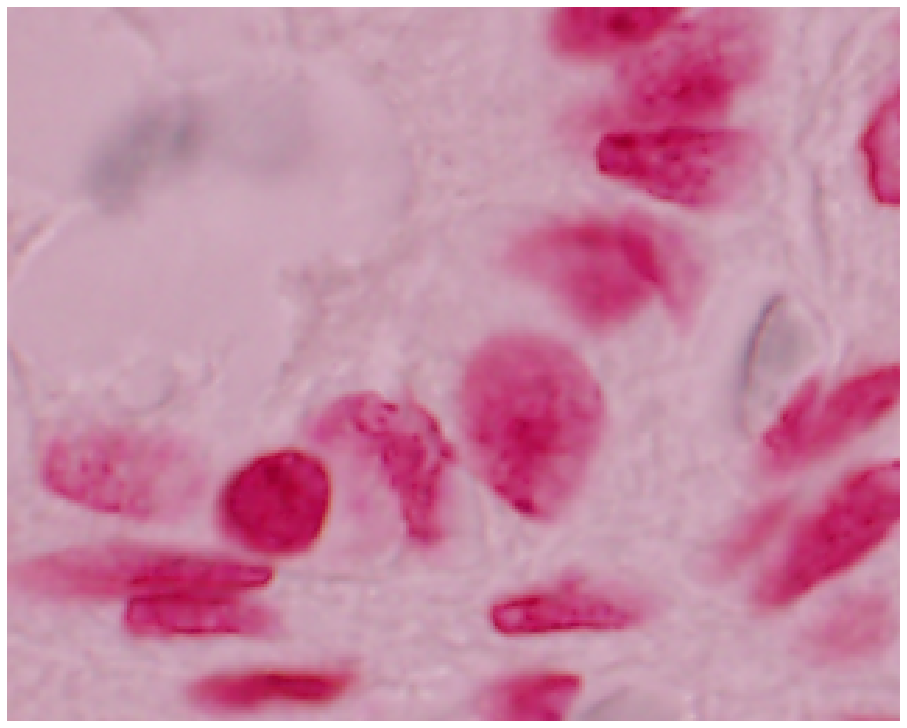

In [93]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(img)

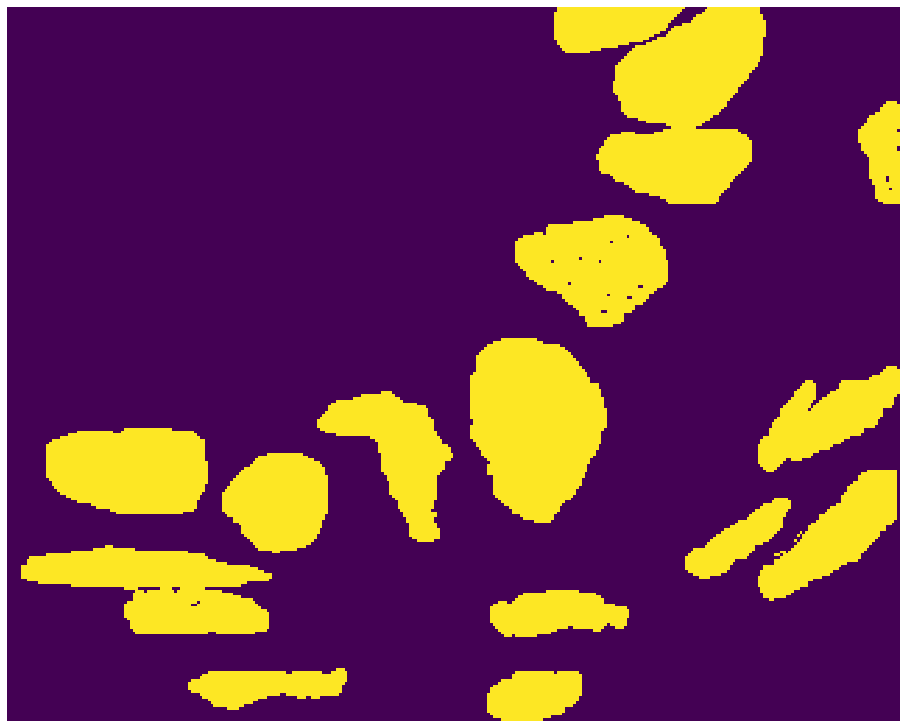

In [94]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(msk)

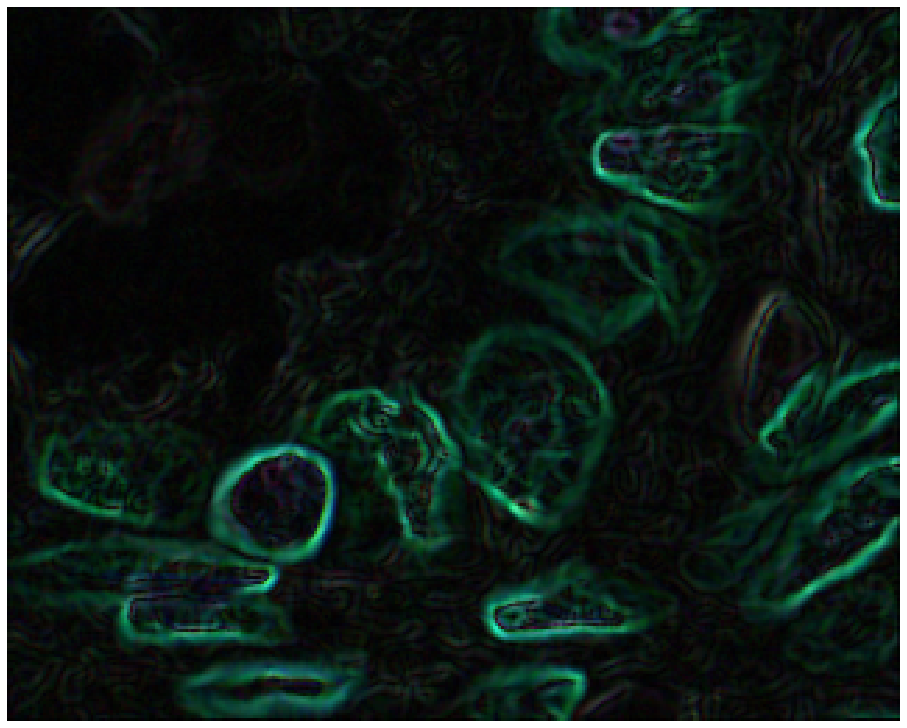

In [95]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(dist)

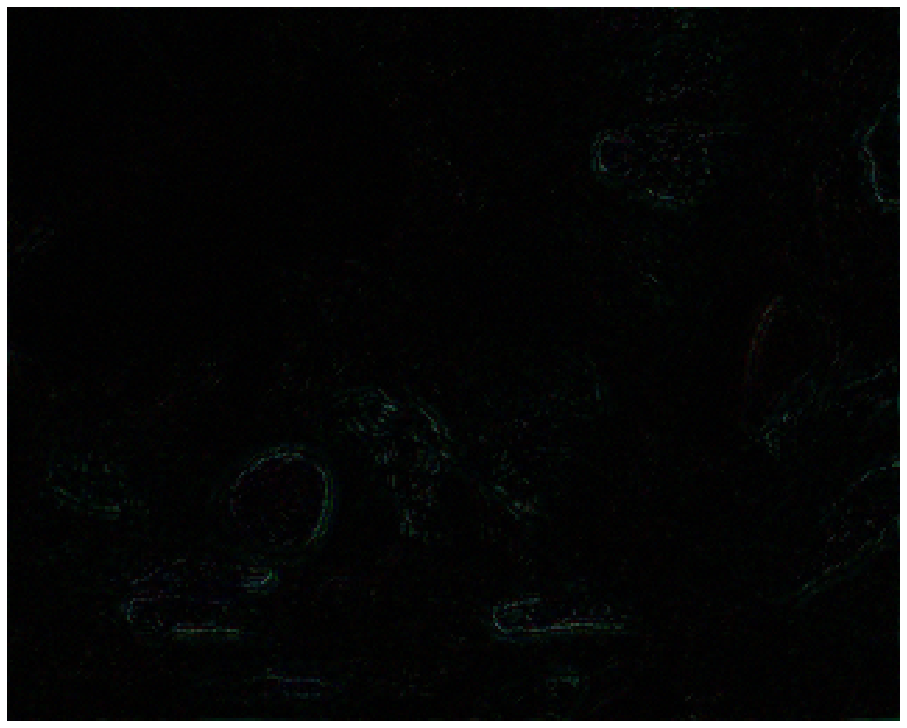

In [96]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(lap)

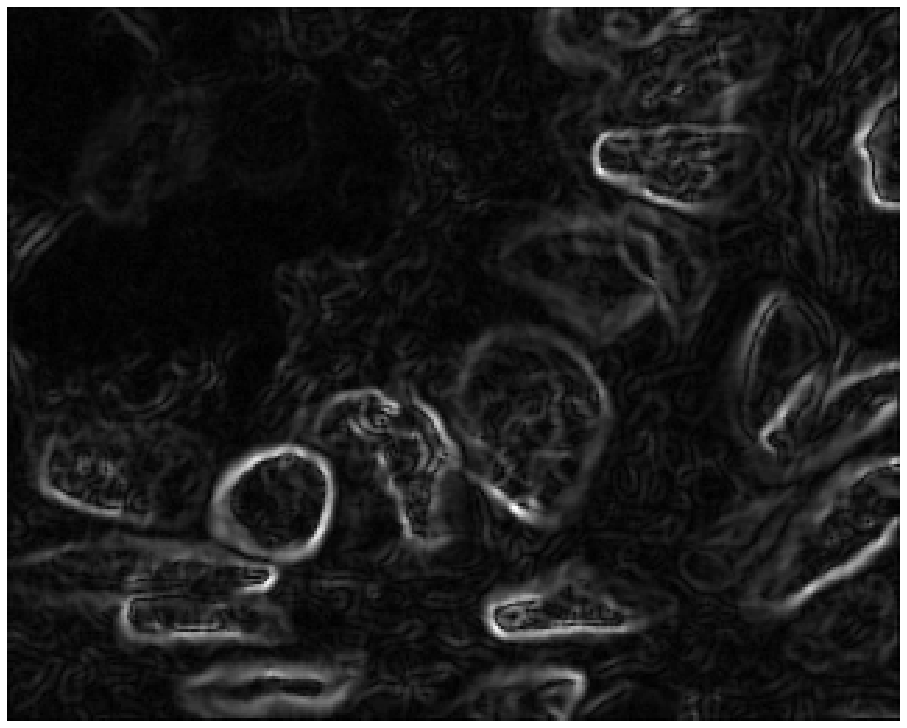

In [97]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(dist_gray, cmap=plt.cm.gray)

In [98]:
edge_roberts = filters.roberts(gray)
edge_sobel = filters.sobel(gray)

edge_scharr = filters.scharr(gray)

edge_prewitt = filters.prewitt(gray)


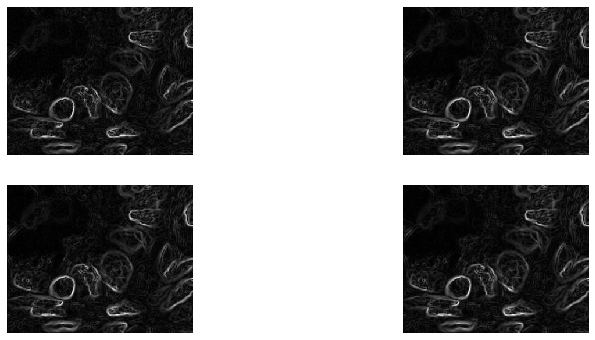

In [99]:
fig = plt.figure(figsize=(13,6)); 

ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(edge_roberts, cmap=plt.cm.gray)
ax = fig.add_subplot(2,2,2);
ax.axis('off')
ax.imshow(edge_sobel, cmap=plt.cm.gray)

ax = fig.add_subplot(2,2,3);
ax.axis('off')
ax.imshow(edge_scharr, cmap=plt.cm.gray)

ax = fig.add_subplot(2,2,4);
ax.axis('off')
ax.imshow(edge_prewitt, cmap=plt.cm.gray)

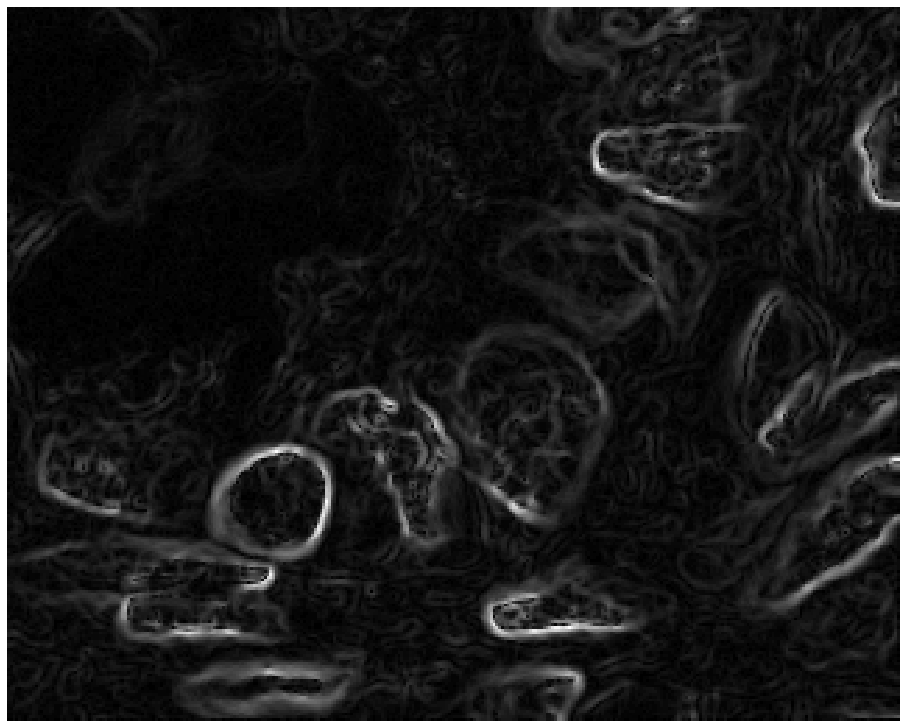

In [100]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(edge_roberts, cmap=plt.cm.gray)

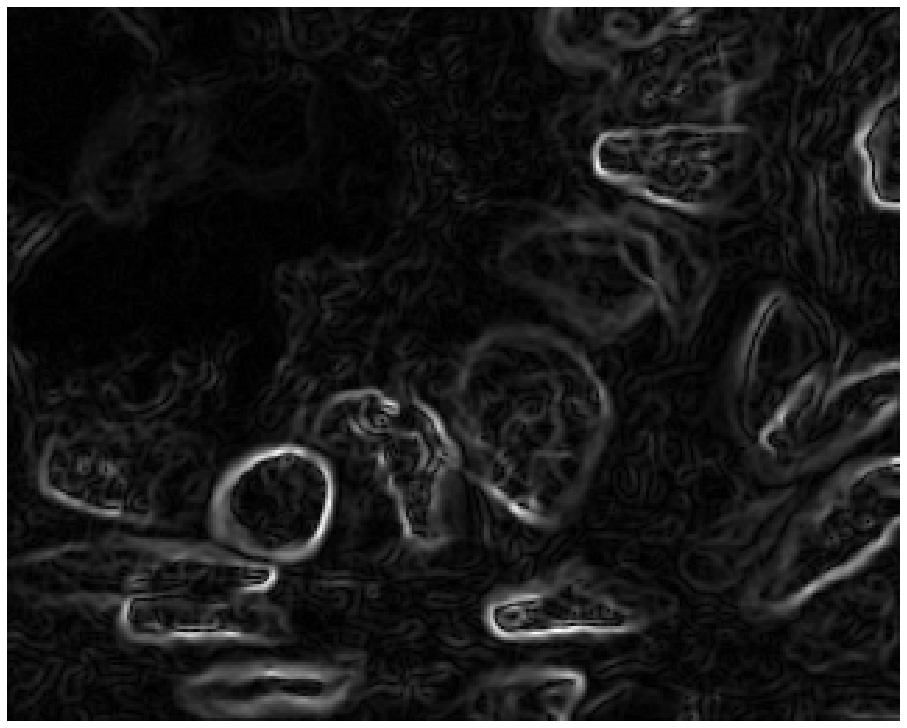

In [101]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(edge_sobel, cmap=plt.cm.gray)

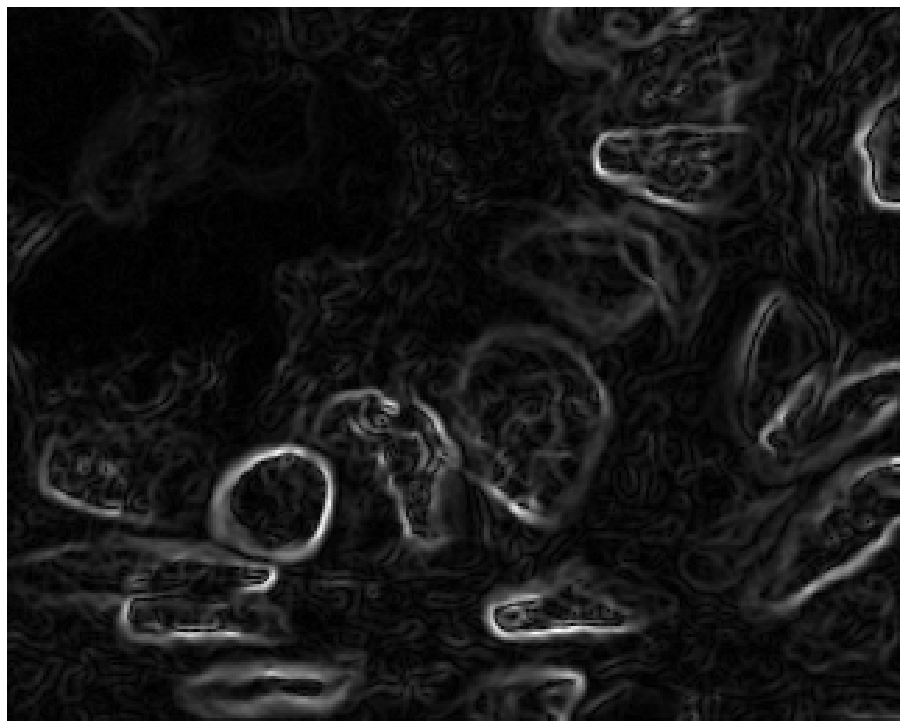

In [132]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(edge_scharr, cmap=plt.cm.gray)

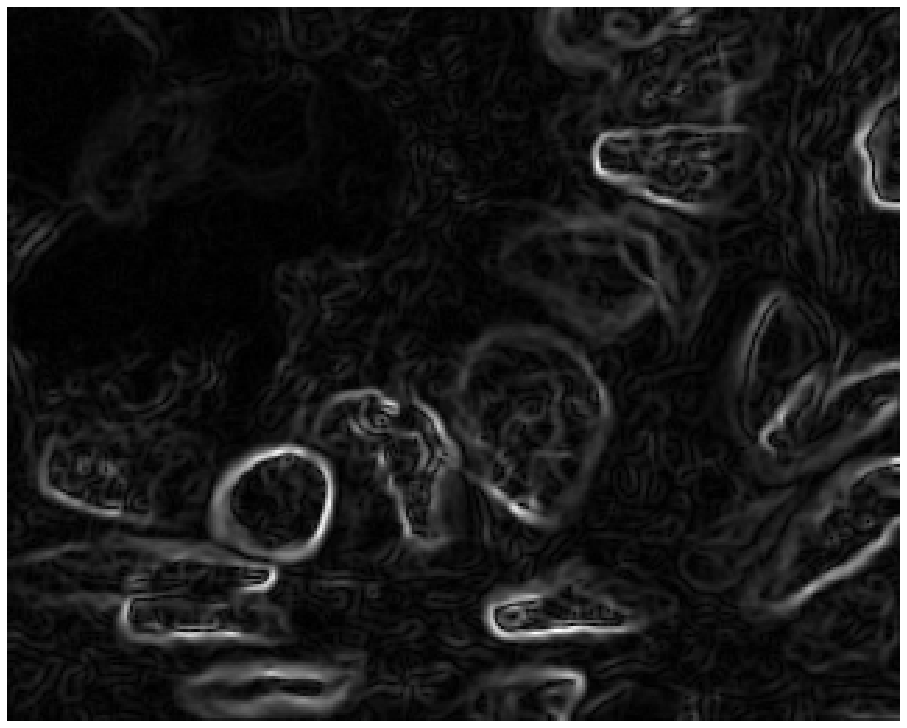

In [103]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(edge_prewitt, cmap=plt.cm.gray)

In [104]:
#canny

sigma=0.33
v = np.median(img)
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))



canny1 = cv2.Canny(img,lower,upper) 
canny2 = cv2.Canny(img, 225,250) 

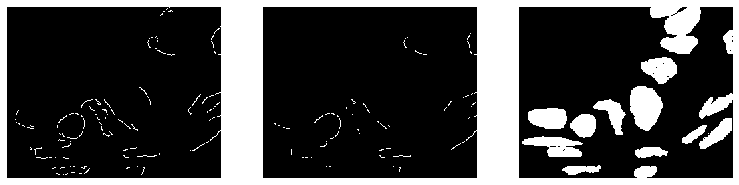

In [105]:
fig = plt.figure(figsize=(13,6)); 

ax = fig.add_subplot(1,3,1)
ax.axis('off')
ax.imshow(canny1, cmap=plt.cm.gray)
ax = fig.add_subplot(1,3,2);
ax.axis('off')
ax.imshow(canny2, cmap=plt.cm.gray)
ax = fig.add_subplot(1,3,3);
ax.axis('off')
ax.imshow(msk, cmap=plt.cm.gray)

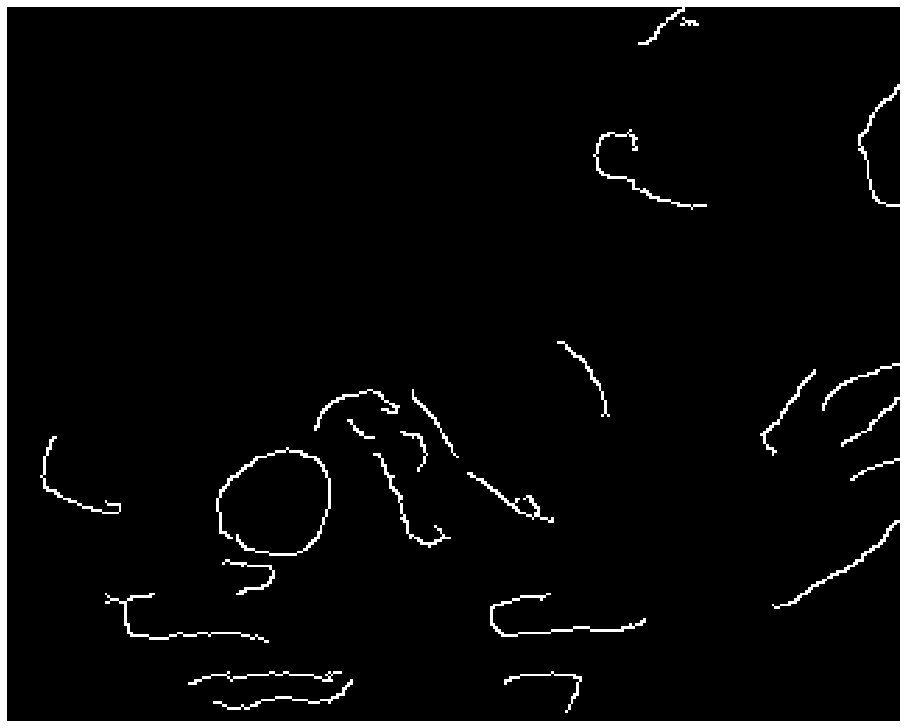

In [106]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(canny1, cmap=plt.cm.gray)

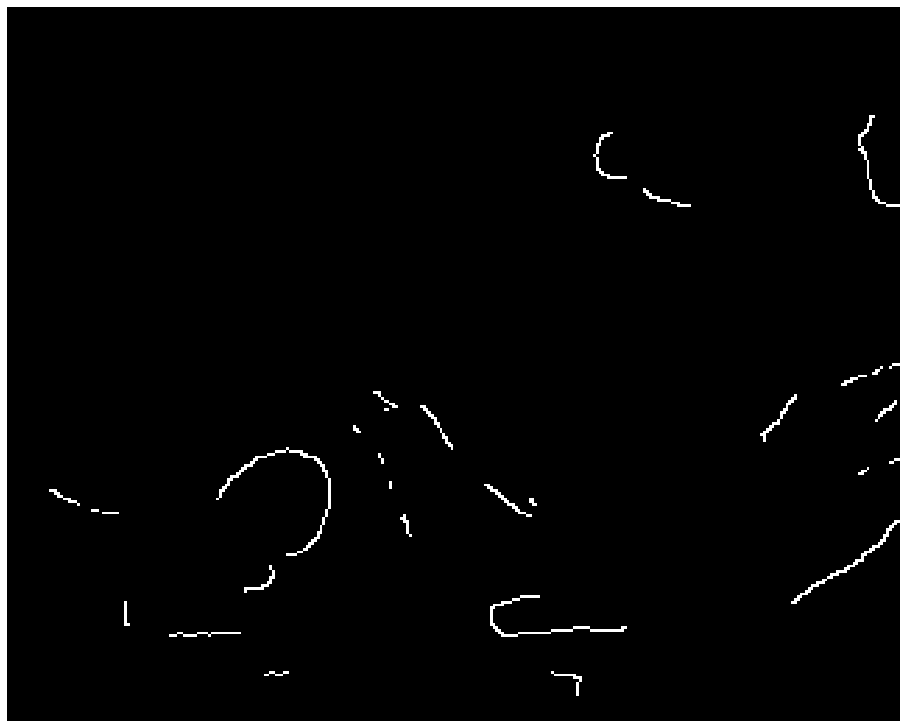

In [107]:
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(canny2, cmap=plt.cm.gray)

In [108]:
canny3 = skimage.feature.canny(gray,sigma=1) 
canny4 = skimage.feature.canny(gray,sigma=4) 

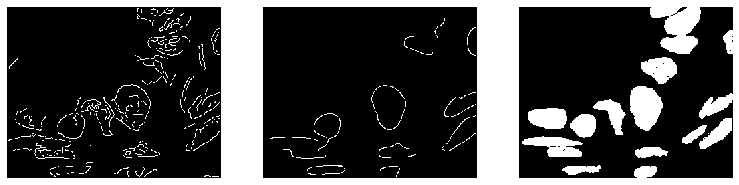

In [109]:
fig = plt.figure(figsize=(13,6)); 

ax = fig.add_subplot(1,3,1)
ax.axis('off')
ax.imshow(canny3, cmap=plt.cm.gray)
ax = fig.add_subplot(1,3,2);
ax.axis('off')
ax.imshow(canny4, cmap=plt.cm.gray)
ax = fig.add_subplot(1,3,3);
ax.axis('off')
ax.imshow(msk, cmap=plt.cm.gray)

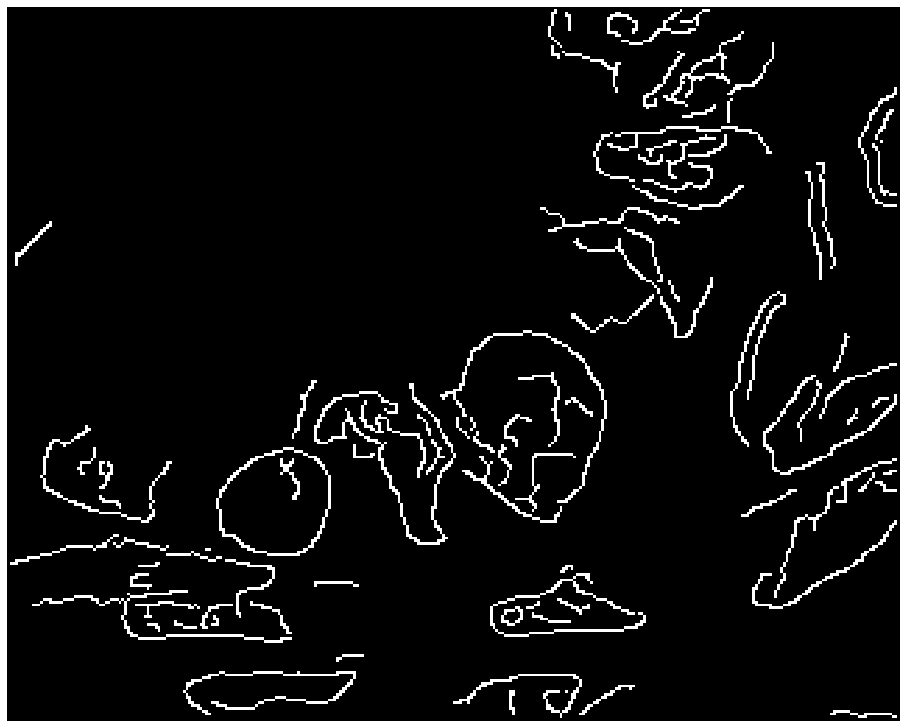

In [111]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(canny3, cmap=plt.cm.gray)

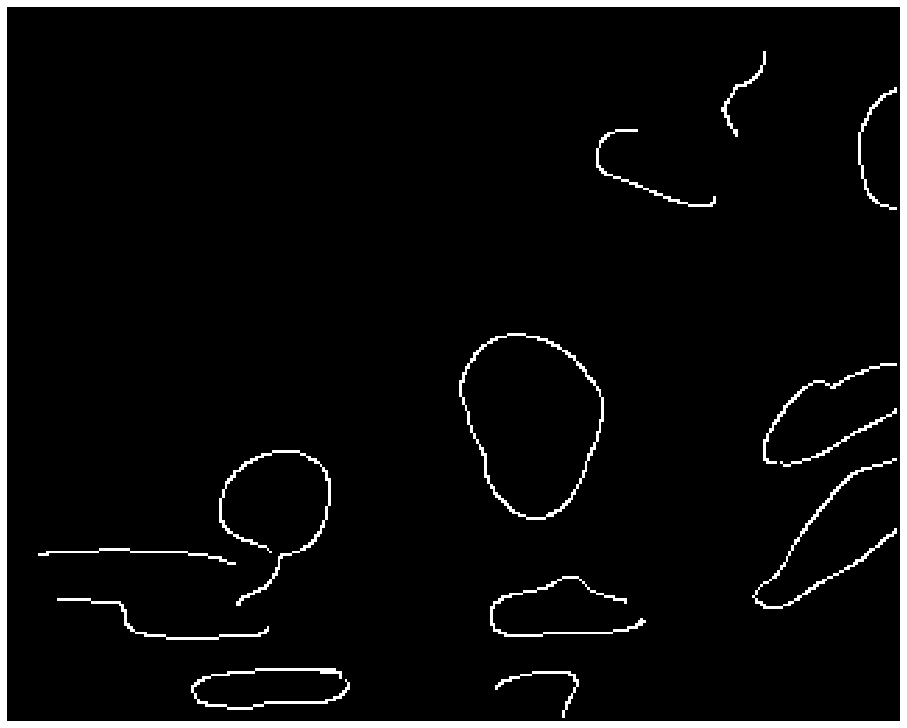

In [112]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(canny4, cmap=plt.cm.gray)

In [12]:
#entropy

In [113]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

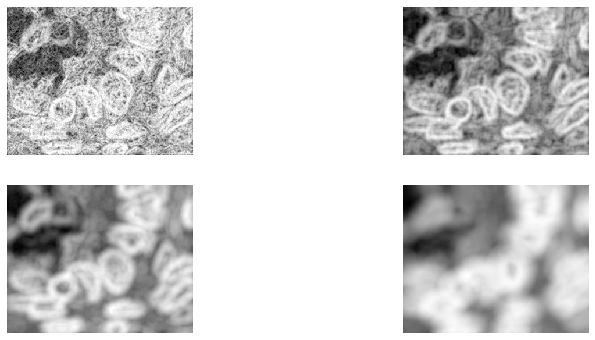

In [114]:
entr_img = entropy(gray, disk(2))

entr_img2 = entropy(gray, disk(5))

entr_img3 = entropy(gray, disk(10))

entr_img4 = entropy(gray, disk(20))


fig = plt.figure(figsize=(13,6)); 
ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(entr_img, cmap=plt.cm.gray)
ax = fig.add_subplot(2,2,2);
ax.axis('off')
ax.imshow(entr_img2, cmap=plt.cm.gray)
ax = fig.add_subplot(2,2,3);
ax.axis('off')
ax.imshow(entr_img3, cmap=plt.cm.gray)
ax = fig.add_subplot(2,2,4);
ax.axis('off')
ax.imshow(entr_img4, cmap=plt.cm.gray)

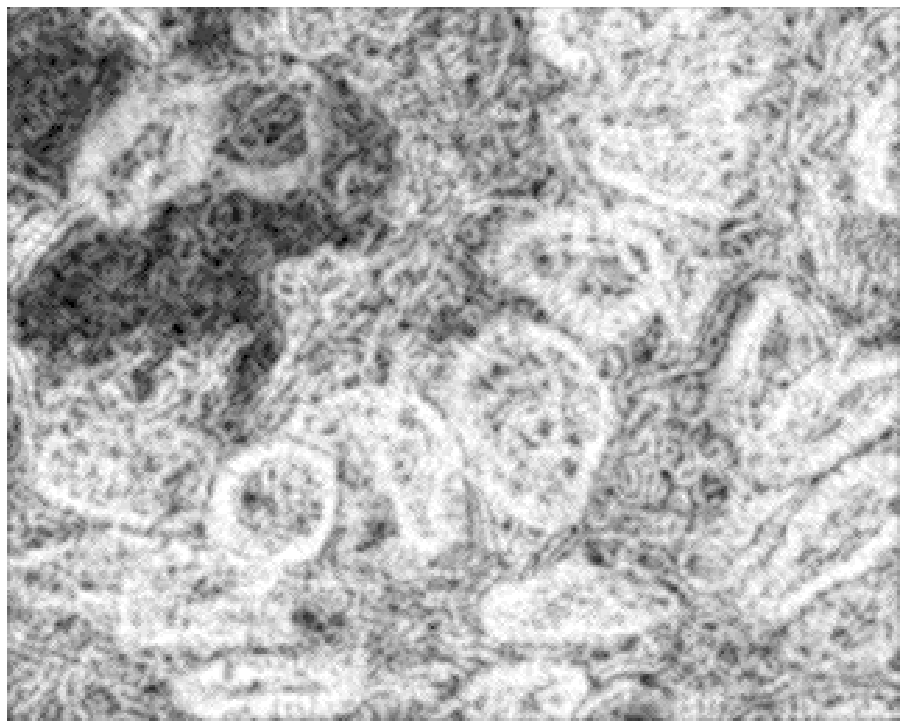

In [115]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(entr_img, cmap=plt.cm.gray)

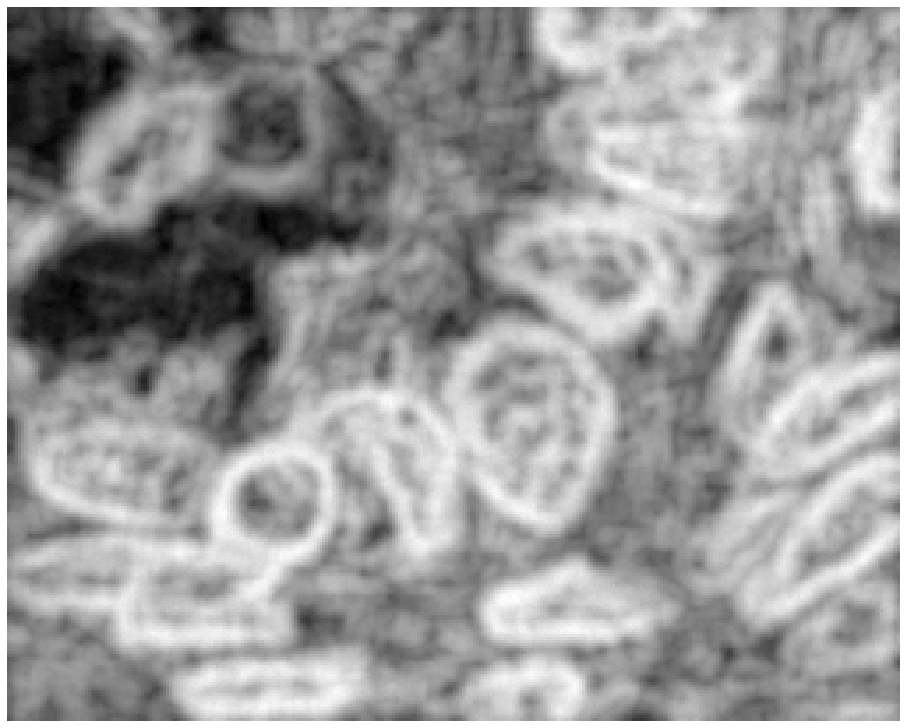

In [116]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(entr_img2, cmap=plt.cm.gray)

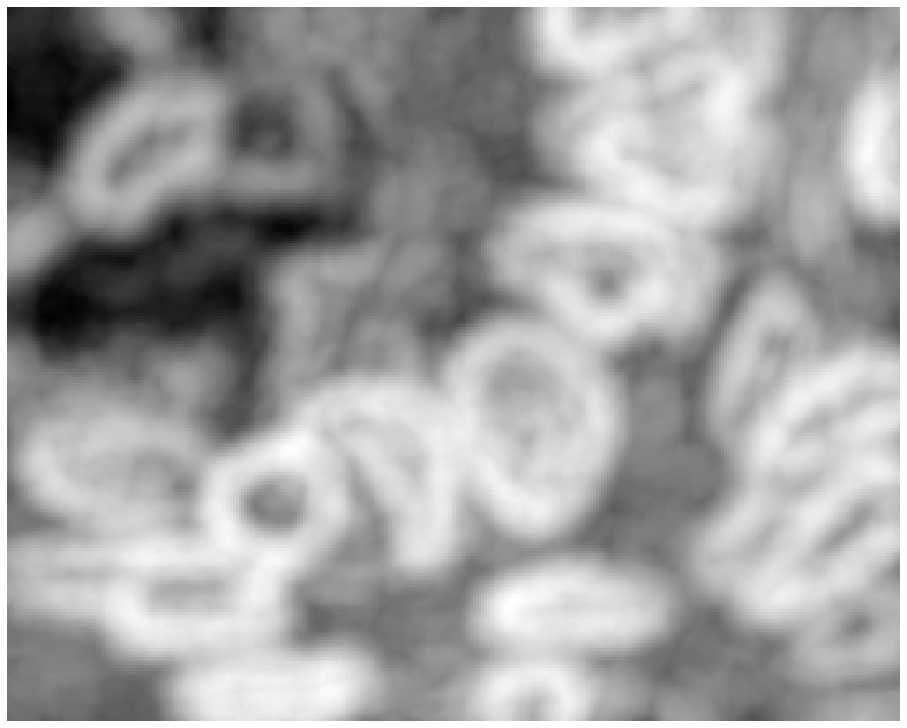

In [117]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(entr_img3, cmap=plt.cm.gray)

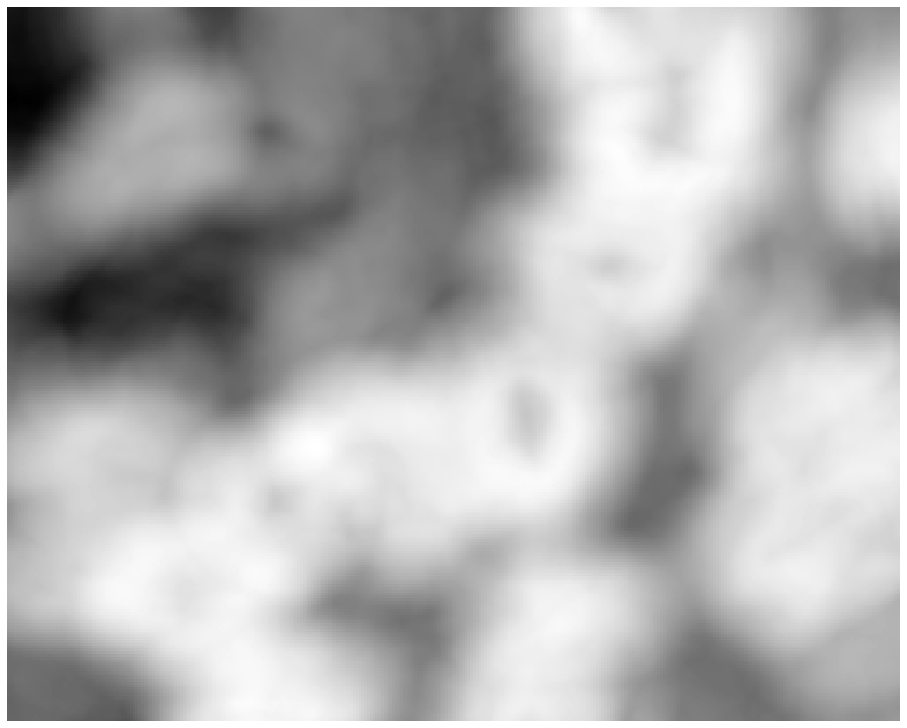

In [118]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(entr_img4, cmap=plt.cm.gray)

In [91]:
np.max(lbp1)

161.0

In [120]:
#lbp
from skimage.feature import local_binary_pattern

In [121]:
radius = 8
n_points = 20 * radius

lbp1 = local_binary_pattern(gray, n_points, radius, "uniform")


radius = 3
n_points = 8 * radius

lbp2 = local_binary_pattern(gray, n_points, radius, "uniform")

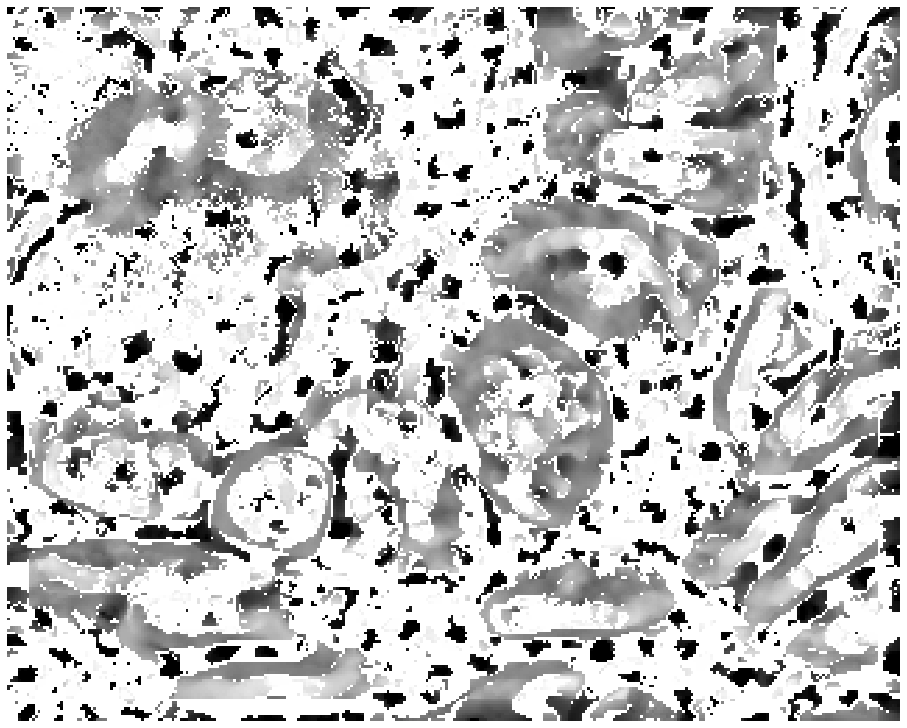

In [122]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(lbp1, cmap=plt.cm.gray)

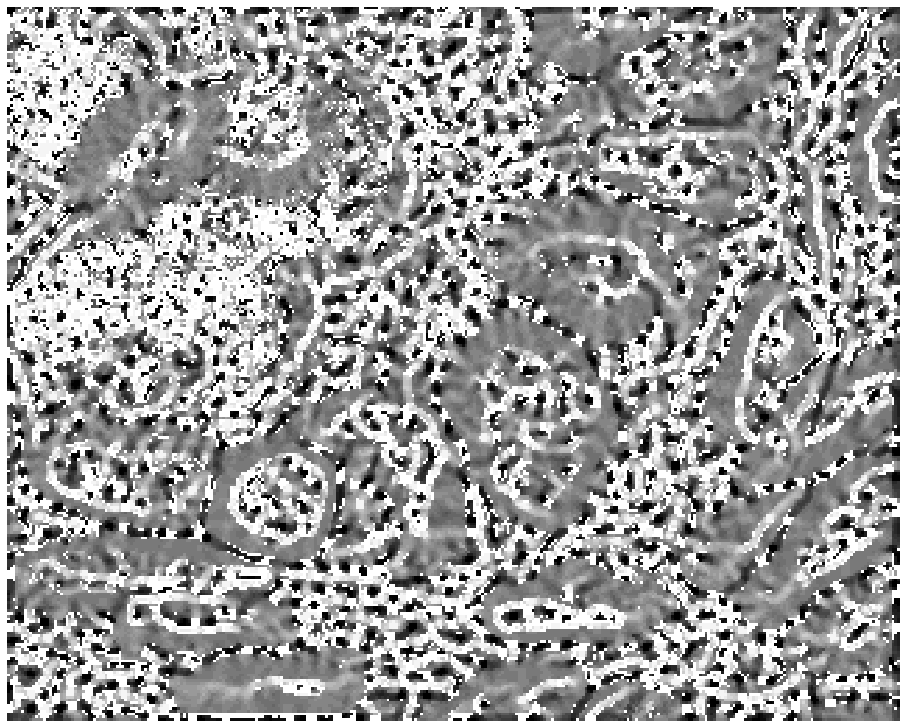

In [123]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(lbp2, cmap=plt.cm.gray)

In [124]:
#coner

dst = cv2.cornerHarris(gray,2,3,0.01)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)


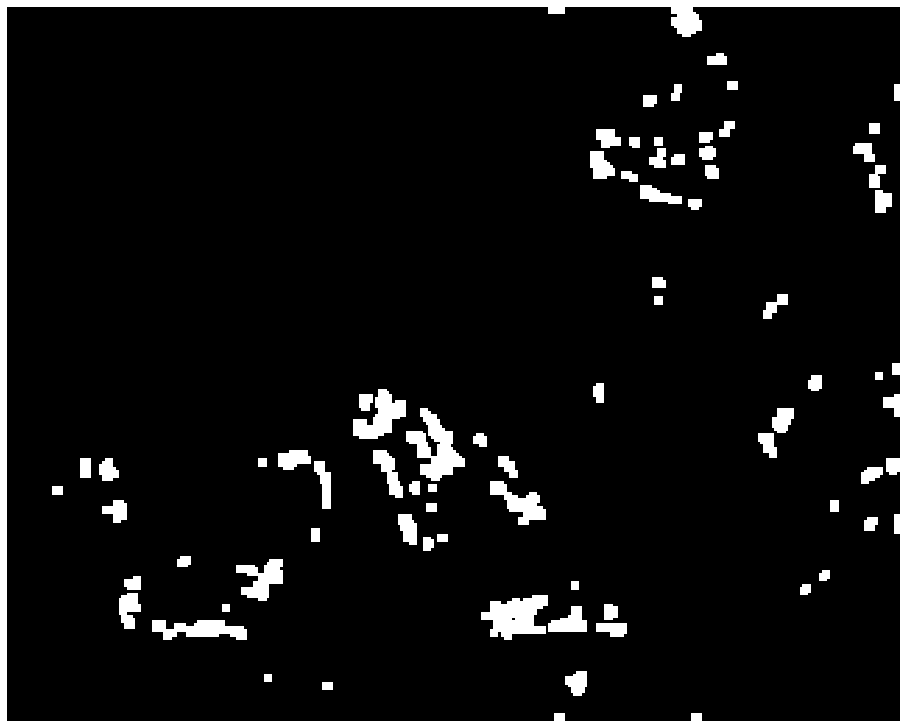

In [125]:
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(dst, cmap=plt.cm.gray )

In [126]:
from skimage.filters import meijering,  frangi, hessian
from skimage.filters import meijering, sato

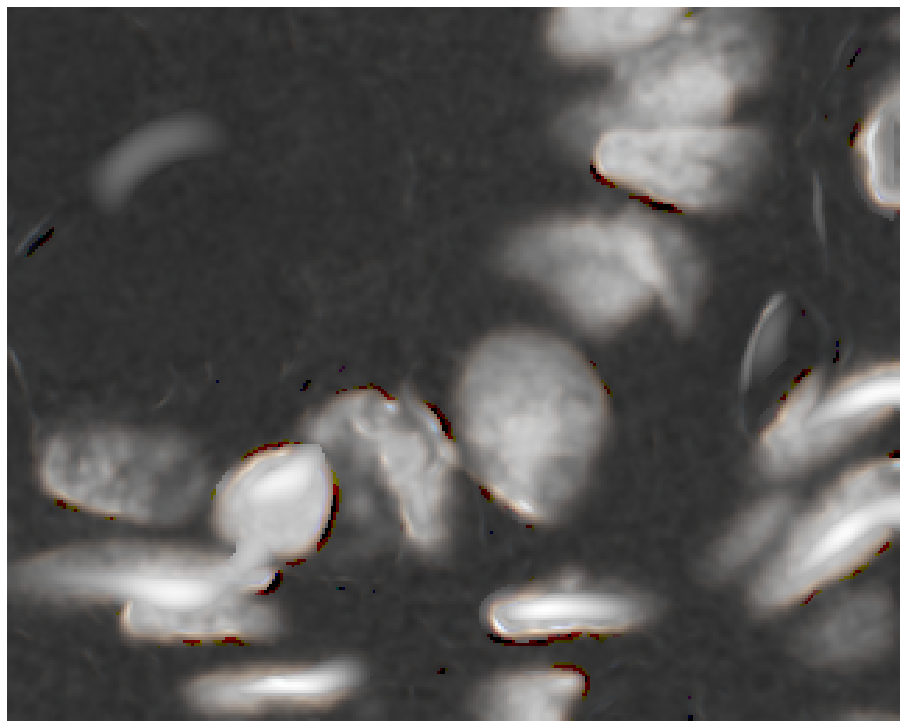

In [127]:

res = skimage.filters.meijering(img)
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(res )

/home/ubuntu/dlenv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  """Entry point for launching an IPython kernel.


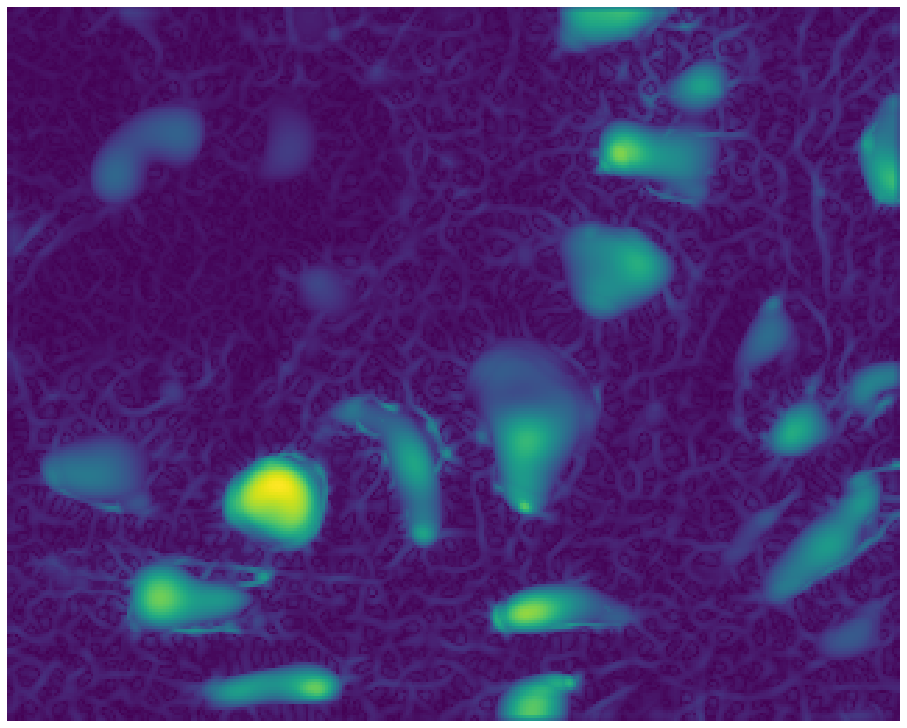

In [128]:
res = skimage.filters.sato(img)
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(res[:,:,0])

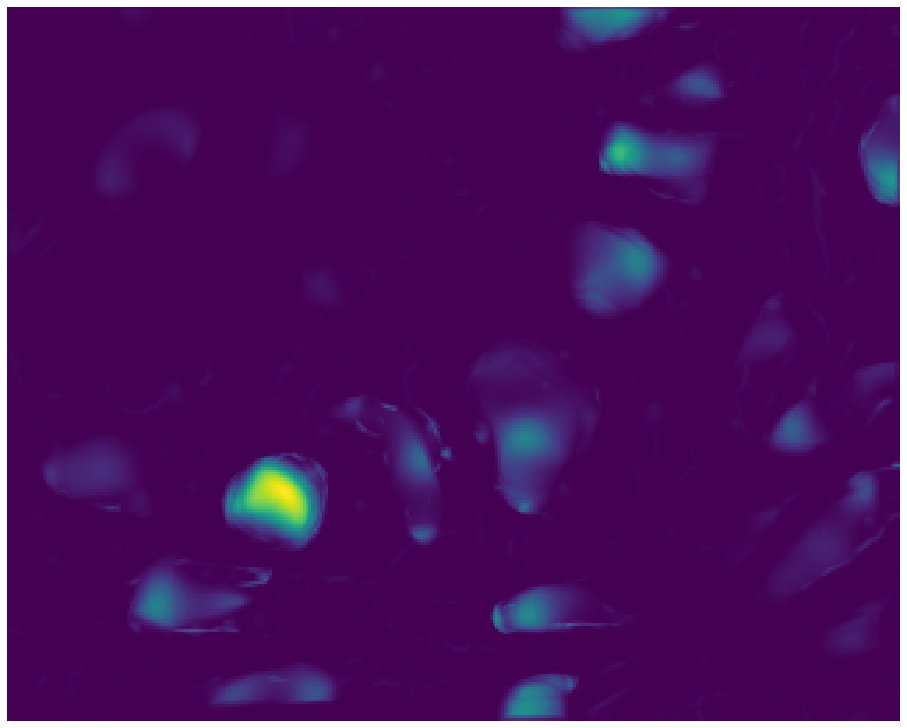

In [131]:
res = skimage.filters.frangi(img)
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(res[:,:,0])

/home/ubuntu/dlenv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  """Entry point for launching an IPython kernel.


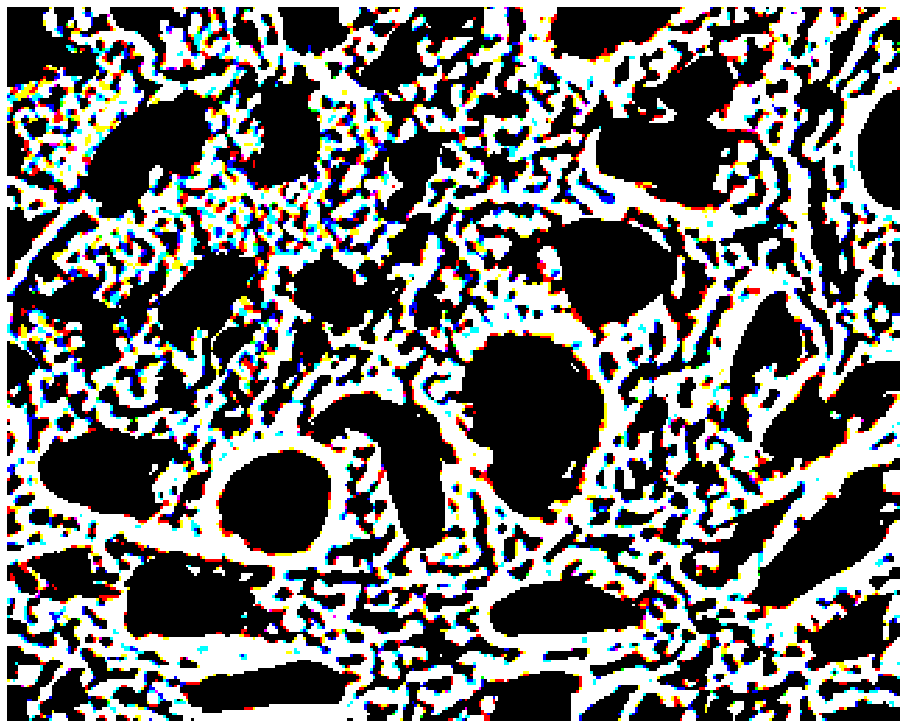

In [130]:
res = skimage.filters.hessian(img)
plt.figure(figsize=(16,16))

plt.axis("off")
plt.imshow(res)